In [59]:
import networkx as nx
# import raphtoryclient 
from pymotif import Motif
import pandas as  pd
import os
import pyvis
from pyvis.network import Network
import matplotlib.pyplot as plt
import numpy as np
import string
import pydot
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import PrecisionRecallDisplay



In [60]:
text = pd.read_csv('/Users/pometry/Desktop/Features/sentiment.csv')
text2 = pd.read_csv('/Users/pometry/Downloads/nlp_labelled.csv')

test = pd.read_csv('test.csv')
test.drop(columns = test.columns[0], axis=1, inplace=True)
test['Ignore_x'] = test['Ignore_x'].astype('string')
test['SourceID'] = test['SourceID'].astype('string')
test['TargetID'] = test['TargetID'].astype('int64')
test['Label_Source'] = test['Label_Source'].astype('string')
test['Label_Target'] = test['Label_Target'].astype('string')



# test = test[test.duplicated(subset=['SourceID', 'TargetID'], keep=False)]
# test = test[test.groupby(['SourceID','TargetID'])['SourceID'].transform('size') > 4]

hh = test.index[test.Label == 'humanhuman']
hb = test.index[test.Label == 'humanbot']
bh= test.index[test.Label == 'bothuman']




text2

,author_id,tweet_similarity,lexical_diversity,sentiment
0,398049962,16.0,98.070940,0.644564
1,3308017024,8.0,98.403361,0.737589
2,440108963,5.5,99.691358,0.634190
3,1242334305948274688,16.0,96.645919,0.596558
4,19294743,12.0,99.636364,0.646406
...,...,...,...,...
125996,1377218434380013570,0.0,100.000000,0.756398
125997,524200177,3.5,96.964286,0.597547
125998,1202945010,1.0,95.833333,0.827006
125999,1101855900959006720,0.0,100.000000,0.361859


In [61]:
# text1 = text[text['sentiment_score']>0.8 ]
# text2 = text[text['sentiment_score']<0.2]
# text = text1.append(text2)
text

,author_id,conversation_id,created_at,entities,id,in_reply_to_user_id,lang,public_metrics,referenced_tweets,source,text,label,sentiment_score,sentiment
0,398049962,1.309378e+18,1.601015e+09,"{'hashtags': [{'text': 'BTC', 'indices': [28, ...",1.309378e+18,NaN,en,"{'retweet_count': 840, 'reply_count': None, 'l...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @Bybit_Official: Bybit's #BTC Draw 🎉\n\nTha...,human,0.654118,Positive
1,3308017024,1.309379e+18,1.601015e+09,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.309379e+18,42623331.0,en,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@rfleschenberg What was the bug root cause?,human,0.545559,Neutral
2,440108963,1.309386e+18,1.601017e+09,"{'hashtags': [{'text': 'Acquirers', 'indices':...",1.309386e+18,NaN,en,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",How #Acquirers and #Merchants Can Beat the Odd...,human,0.556009,Neutral
3,1242334305948274688,1.309388e+18,1.601018e+09,"{'hashtags': [{'text': 'telehealth', 'indices'...",1.309388e+18,NaN,en,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Looking for a trustworthy Telehealth App?\nWe ...,human,0.251360,Negative
4,19294743,1.309392e+18,1.601018e+09,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.309392e+18,NaN,en,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",It was very interesting to explore the impact ...,human,0.963745,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076547,1391848122217734146,1.503399e+18,1.647273e+09,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.503399e+18,NaN,en,"{'retweet_count': 1, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @Jason_R_Gillis: @DanielVanDam6 @ElFinancie...,human,0.385671,Negative
2076548,801717287300530176,1.503399e+18,1.647273e+09,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.503399e+18,NaN,en,"{'retweet_count': 1, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @pzwarne: @mjtward19 Putin's told him to ke...,human,0.798272,Positive
2076549,1391848122217734146,1.503399e+18,1.647273e+09,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.503399e+18,NaN,en,"{'retweet_count': 1, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @Jason_R_Gillis: @MGH1955 @ElFinanciero_Mx ...,human,0.429379,Neutral
2076550,1391848122217734146,1.503399e+18,1.647273e+09,"{'hashtags': [], 'symbols': [], 'user_mentions...",1.503399e+18,NaN,en,"{'retweet_count': 1, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/android"" ...",RT @Jason_R_Gillis: @MalthusGamba @ElFinancier...,human,0.273655,Negative


In [62]:
text = text.rename(columns={"author_id":"SourceID"})
text = text.rename(columns={"in_reply_to_user_id":"TargetID"})
# text['TargetID'] = text['TargetID'].astype('int64')
text['SourceID'] = text['SourceID'].astype('string')
test = pd.merge(test,text, how = 'left',on = ['SourceID'] )
test.drop_duplicates(subset = 'SourceID',keep = 'first', inplace = True) 



In [63]:
# test = test[test['Label_Source'].isna()==False]
# test = test[test['text'].isna()==False]
# test = test[test['SourceID'].isna()==False]
# test = test[test['TargetID'].isna()==False]
# test = test[test['sentiment'].isna()==False]
# test = test.drop_duplicates()




In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10819 entries, 0 to 68242443
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ignore_x           10819 non-null  string 
 1   Ignore_x.1         10819 non-null  int64  
 2   SourceID           10819 non-null  string 
 3   TargetID_x         10819 non-null  int64  
 4   Label_Source       10819 non-null  string 
 5   Label_Target       10819 non-null  string 
 6   Label              10819 non-null  object 
 7   LTCount            10819 non-null  int64  
 8   batch              10819 non-null  int64  
 9   f/f                10819 non-null  float64
 10  l/t                10818 non-null  float64
 11  n/u                10819 non-null  float64
 12  DateDiff           10819 non-null  float64
 13  PR                 10819 non-null  float64
 14  verified           10819 non-null  bool   
 15  url                7592 non-null   object 
 16  diff               

# MACHINE LEARNING------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [65]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)
# test.dropna(how="any", inplace=True)
test.drop_duplicates(subset = 'SourceID',keep = 'first', inplace = True) 

text2 = text2.rename(columns={"author_id":"SourceID"})
text2['SourceID']=text2['SourceID'].astype('string')
test = pd.merge(test,text2, how = 'left',on = ['SourceID'] )

# teee = test.head(3)
# testhum=teee[teee['Label_Source']=='human'].index
# test1=test.drop(testhum)
test1=test
test1

,Ignore_x,Ignore_x.1,SourceID,TargetID_x,Label_Source,Label_Target,Label,LTCount,batch,f/f,...,public_metrics,referenced_tweets,source,text,label,sentiment_score,sentiment_x,tweet_similarity,lexical_diversity,sentiment_y
0,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,"{'retweet_count': 3, 'reply_count': None, 'lik...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @Drhaclarke: @BethDarnall @IASPpain @speaki...,human,0.888911,Positive,19.0,99.025365,0.615870
1,1647273198,1647273198,916075086687408128,36262246,human,human,humanhuman,2,12,1.738832,...,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Usually, costs go up when scaling. # of active...",human,0.523836,Neutral,18.5,99.455440,0.608544
2,1647273198,1647273198,45604122,36262246,human,human,humanhuman,19,12,0.037924,...,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",@diogomartf Thanks Diogo 🙌 I will be in touch,human,0.979988,Positive,19.5,94.720322,0.678240
3,1647273198,1647273198,307240276,38229171,human,human,humanhuman,5,12,1.796564,...,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@ThisIsJoshTseng Wouldn't be a radical change....,human,0.681449,Positive,18.0,97.875685,0.465690
4,1647273198,1647273198,79276505,38229171,human,human,humanhuman,30,12,0.132227,...,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/android"" ...",@Shpigford @LaserTweets Sorry that turned into...,human,0.488007,Neutral,21.0,98.489936,0.559709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10814,1647273198,1647273198,53097744,115378178,human,human,humanhuman,5,12,0.037836,...,"{'retweet_count': 0, 'reply_count': None, 'lik...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",@SayedHa39253634 I asked a Taliban spokesman j...,human,0.155733,Negative,17.5,98.479566,0.494300
10815,1647273198,1647273198,1072730425,928196912,human,human,humanhuman,0,12,0.257670,...,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",NaN,Twitter for iPhone,The greatest joke ever told was when Harris Wi...,human,0.918107,Positive,2.0,98.000000,0.530721
10816,1647273198,1647273198,245821992,2402374440,human,human,humanhuman,0,14151945,0.149264,...,"{'retweet_count': 3, 'reply_count': 0, 'like_c...","[{'type': 'retweeted', 'id': '1501989444517310...",Twitter Web App,RT @kuldeep_saxena: Finally placed the order.....,human,0.959641,Positive,1.5,100.000000,0.953533
10817,1647273198,1647273198,16225240,36728196,human,human,humanhuman,2,12,0.001244,...,"{'retweet_count': 9, 'reply_count': 24, 'like_...",NaN,Twitter for iPhone,Just landed! It’s almost spring. Why is it so ...,human,0.051723,Negative,17.0,97.382455,0.648692


In [66]:
test1.loc[test1['url'].notnull(), 'url'] = 1
test1.loc[test1['url'].isnull(), 'url'] = 0

test1.loc[test1['l/t'].isnull(), 'l/t'] = test1['l/t'].max()
test1.loc[test1['f/f'].isnull(), 'f/f'] = test1['f/f'].max()
test1.loc[test1['tweet_similarity'].isnull(), 'tweet_similarity'] =0
test1.loc[test1['lexical_diversity'].isnull(), 'lexical_diversity'] = 0


test1.isna().sum()

Ignore_x                0
Ignore_x.1              0
SourceID                0
TargetID_x              0
Label_Source            0
Label_Target            0
Label                   0
LTCount                 0
batch                   0
f/f                     0
l/t                     0
n/u                     0
DateDiff                0
PR                      0
verified                0
url                     0
diff                    0
In_degree               0
Out_degre               0
Degree                  0
Influence               0
conversation_id         0
created_at              0
entities              287
id                      0
TargetID_y           6087
lang                    0
public_metrics          0
referenced_tweets    8766
source                  0
text                    0
label                   0
sentiment_score         0
sentiment_x             0
tweet_similarity        0
lexical_diversity       0
sentiment_y           213
dtype: int64

In [67]:
testML = test1[['SourceID','Label_Source','LTCount','batch','f/f','l/t','n/u','DateDiff','PR','verified','diff','In_degree','Out_degre','Degree','sentiment_score','tweet_similarity','lexical_diversity','Influence']]
testML.describe(include = 'all')

,SourceID,Label_Source,LTCount,batch,f/f,l/t,n/u,DateDiff,PR,verified,diff,In_degree,Out_degre,Degree,sentiment_score,tweet_similarity,lexical_diversity,Influence
count,10819,10819,10819.000000,1.081900e+04,10819.000000,10819.000000,10819.000000,1.081900e+04,10819.000000,10819,1.081900e+04,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000,10819.000000
unique,10819,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2569574719,human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,10188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.407431,1.052152e+07,2.055022,0.085920,0.648248,6.429159e+07,0.276742,NaN,2.363061e+05,1.526574,9.502172,10.453739,0.636694,14.442093,95.396117,-0.554191
std,NaN,NaN,8.039225,1.408543e+08,14.345017,1.659584,0.290062,9.417380e+07,0.371044,NaN,5.631148e+05,3.156618,7.499582,7.688252,0.252571,7.825021,13.740325,0.288964
min,NaN,NaN,0.000000,1.200000e+01,0.000000,0.000000,0.000000,3.909739e+05,0.150000,NaN,0.000000e+00,0.000000,1.000000,1.000000,0.008762,0.000000,0.000000,-0.997803
25%,NaN,NaN,0.000000,1.200000e+01,0.089692,0.002867,0.416667,1.184189e+07,0.150000,NaN,3.697844e+03,0.000000,2.000000,4.000000,0.452329,7.500000,96.377131,-0.730796
50%,NaN,NaN,1.000000,1.200000e+01,0.406046,0.009287,0.689655,2.597050e+07,0.159011,NaN,4.675586e+04,1.000000,8.000000,9.000000,0.679965,17.500000,97.687135,-0.617728
75%,NaN,NaN,9.000000,1.200000e+01,1.053881,0.026368,0.928571,6.988959e+07,0.193495,NaN,2.563354e+05,2.000000,15.000000,15.000000,0.850669,19.000000,98.664996,-0.484494


In [68]:
testML = testML.set_index('SourceID')
testML.isna().sum()


Label_Source         0
LTCount              0
batch                0
f/f                  0
l/t                  0
n/u                  0
DateDiff             0
PR                   0
verified             0
diff                 0
In_degree            0
Out_degre            0
Degree               0
sentiment_score      0
tweet_similarity     0
lexical_diversity    0
Influence            0
dtype: int64

In [69]:
testML.dtypes

Label_Source          string
LTCount                int64
batch                  int64
f/f                  float64
l/t                  float64
n/u                  float64
DateDiff             float64
PR                   float64
verified                bool
diff                 float64
In_degree              int64
Out_degre              int64
Degree                 int64
sentiment_score      float64
tweet_similarity     float64
lexical_diversity    float64
Influence            float64
dtype: object

In [70]:
testML_clean = testML.copy(deep=True) # Make a copy of the DataFrame
for column in testML_clean.columns:   
    if column not in ['Label_Source']: # Exclude non discrete columns and the target
        testML_clean[column] = testML_clean[column].astype('category') # Convert using astype(...) method

In [71]:
testML_clean

,Label_Source,LTCount,batch,f/f,l/t,n/u,DateDiff,PR,verified,diff,In_degree,Out_degre,Degree,sentiment_score,tweet_similarity,lexical_diversity,Influence
SourceID,,,,,,,,,,,,,,,,,
2569574719,human,1,12,0.122713,0.036212,0.846154,1.344119e+07,0.150000,True,82824.421053,0,12,12,0.888911,19.0,99.025365,-0.781430
916075086687408128,human,2,12,1.738832,0.009452,0.352941,3.973683e+06,0.150000,False,711316.868421,0,16,16,0.523836,18.5,99.455440,-0.544518
45604122,human,19,12,0.037924,0.008191,0.592593,1.532465e+07,0.443543,False,8617.962963,2,19,19,0.979988,19.5,94.720322,-0.668018
307240276,human,5,12,1.796564,0.019160,0.666667,2.343911e+07,0.165879,False,2977.933333,2,27,29,0.681449,18.0,97.875685,-0.404828
79276505,human,30,12,0.132227,0.023626,0.421053,2.242943e+07,0.452779,False,19210.944444,4,26,28,0.488007,21.0,98.489936,-0.533402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53097744,human,5,12,0.037836,0.057986,0.736842,2.744632e+07,0.334337,True,133836.400000,2,5,6,0.155733,17.5,98.479566,0.168649
1072730425,human,0,12,0.257670,0.002282,0.333333,1.001806e+08,0.747430,False,12183.666667,2,1,2,0.918107,2.0,98.000000,-0.908682
245821992,human,0,14151945,0.149264,0.044197,0.204082,1.808358e+08,0.371351,False,106779.500000,1,1,2,0.959641,1.5,100.000000,-0.986764


In [72]:

# Extract 1-Hot Encoding into X and add floating-point columns
X = testML_clean.drop('Label_Source', axis=1)
column_names = X.columns
# Convert to Numpy Array
X = X.values

y = testML_clean['Label_Source'].values # Target vector
print('y shape: {}'.format(np.shape(y)))

y shape: (10819,)


In [73]:
print('X shape: {}'.format(X.shape))

X shape: (10819, 16)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

In [75]:
print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))


Number of instances in X: 10819
Number of instances in X_train: 9737
Number of instances in X_test: 1082
Number of instances in X_train and X_test together: 10819


In [76]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1000, class_weight='balanced')
dt.fit(X_train.astype(float), y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, random_state=1000)

In [77]:
with open("tree.dot", 'w') as f:
    f = export_graphviz(dt, out_file=f,
                        feature_names=column_names,  
                        class_names=testML_clean['Label_Source'].unique(),  
                        filled=True, rounded=True,  
                        special_characters=False)


In [78]:
X_test[0]

array([0, 12, 2.8233830845771144, 0.0121028744326777, 0.9230769230769232,
       7133321.0, 0.15, False, 339584.5333333333, 0, 2, 2, 0.78828067,
       15.0, 94.2333276980008, -0.49075878], dtype=object)

In [79]:
for i, column in enumerate(column_names):
    if dt.feature_importances_[i] > 0:
        print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))


Importance of feature LTCount:, 0.002
Importance of feature batch:, 0.009
Importance of feature f/f:, 0.445
Importance of feature l/t:, 0.017
Importance of feature n/u:, 0.015
Importance of feature DateDiff:, 0.053
Importance of feature PR:, 0.072
Importance of feature verified:, 0.150
Importance of feature diff:, 0.125
Importance of feature In_degree:, 0.025
Importance of feature Out_degre:, 0.003
Importance of feature Degree:, 0.017
Importance of feature sentiment_score:, 0.015
Importance of feature tweet_similarity:, 0.008
Importance of feature lexical_diversity:, 0.025
Importance of feature Influence:, 0.018


In [80]:
prediction_train = dt.predict(X=X_train)
prediction_test = dt.predict(X=X_test)
print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_train,prediction_train)))
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)))


Classification accuracy on training set: 0.775
Classification accuracy on test set: 0.762


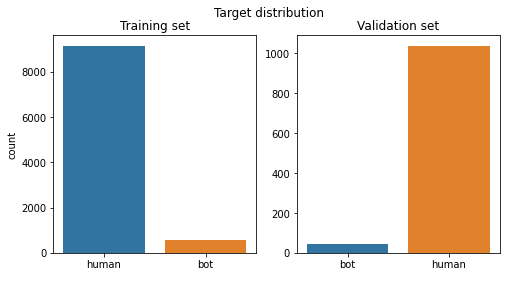

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
sns.countplot(x=y_train, ax=ax1)
ax1.set_title('Training set', size=12)
ax1.set_xlabel(' ')
sns.countplot(x=y_test, ax=ax2)
ax2.set_xlabel(' ')
ax2.set_ylabel('')
ax2.set_title('Validation set', size=12)
fig.suptitle('Target distribution', size=12)
plt.show()

In [82]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

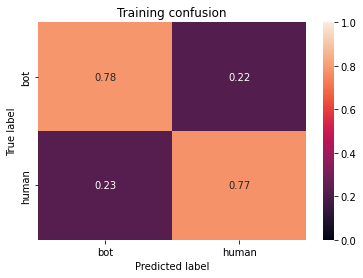

In [83]:
# Normalised Data
cm = confusion_matrix(y_train, prediction_train)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

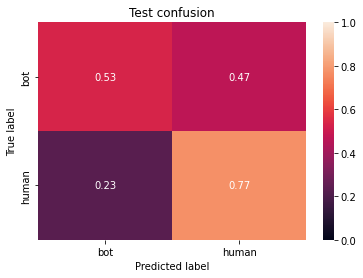

In [84]:
# Validation Data
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Test confusion')


Classification accuracy on test set: 0.959


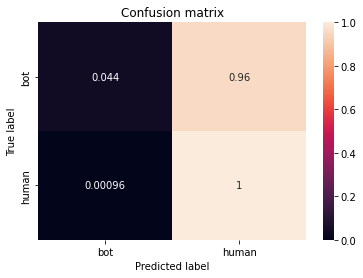

In [85]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)))
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.959
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.707
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.727
Classification accuracy on test set with max features = 1 and max_depth = 10: 0.841
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.959
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.712
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.758
Classification accuracy on test set with max features = sqrt and max_depth = 10: 0.885
Classification accuracy on test set with max features = log2 and max_depth = None: 0.959
Classification accuracy on test set with max features = log2 and max_depth = 2: 0.712
Classification accuracy on test set with max features = log2 and max_depth = 5: 0.758
Classification accuracy on test set with max features =

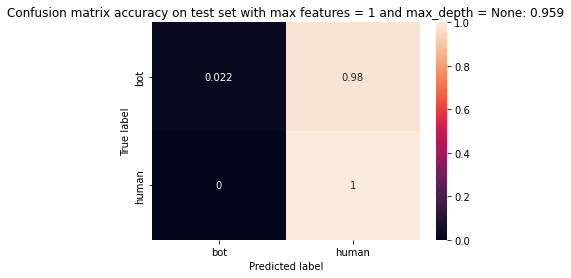

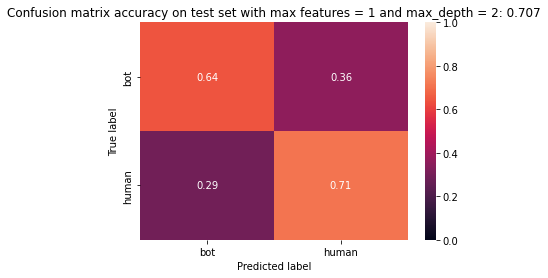

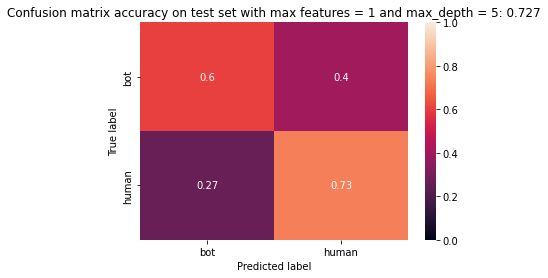

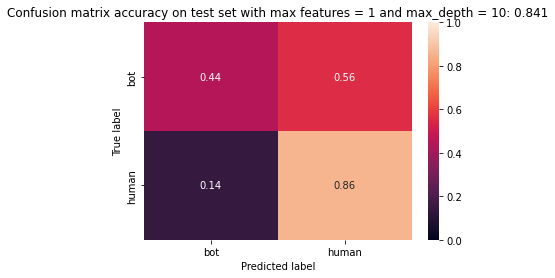

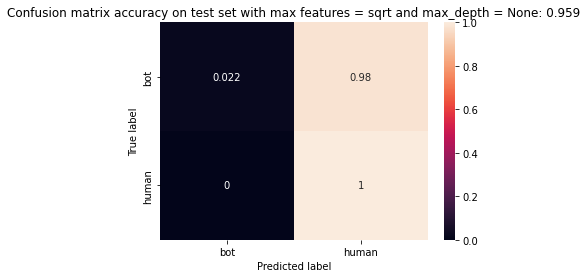

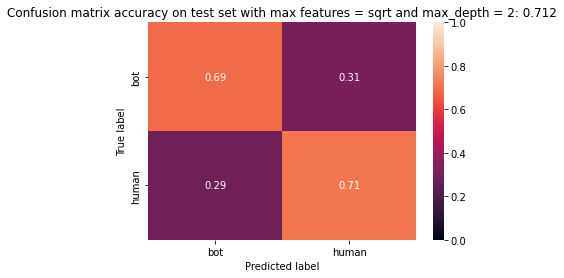

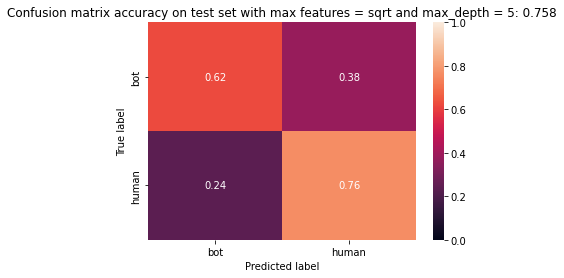

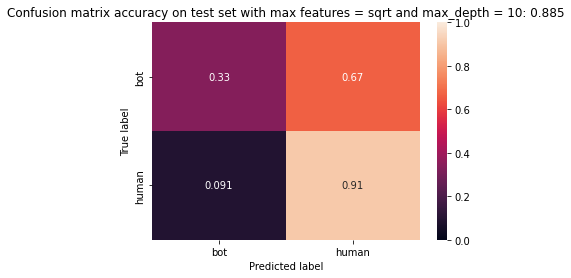

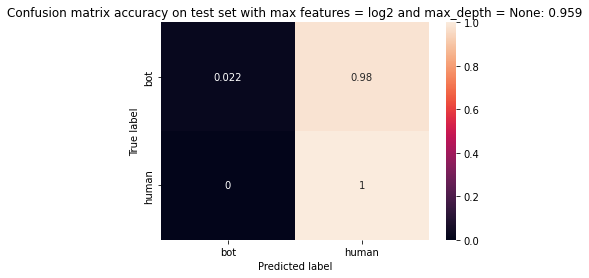

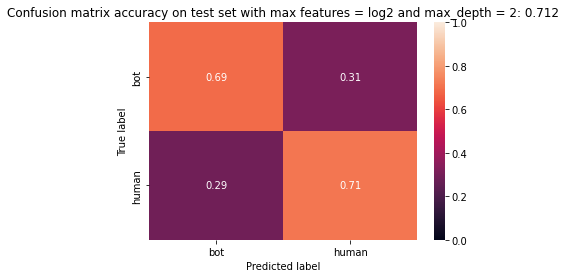

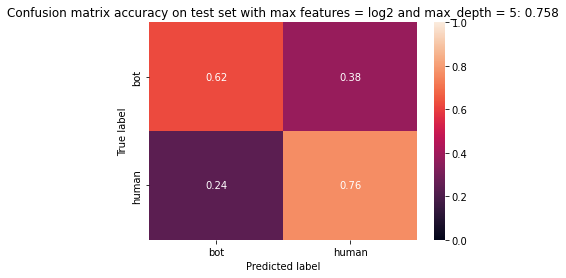

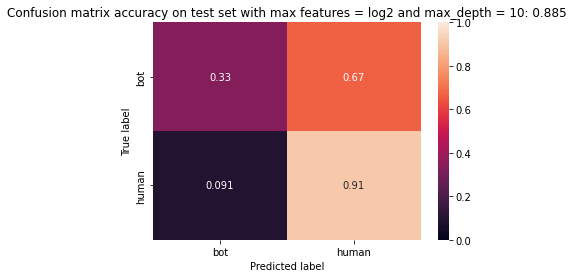

In [86]:
# Student needs to provide code similar to below
from itertools import product
n_estimators = 500
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 5, 10]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337, class_weight='balanced')
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_, title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))


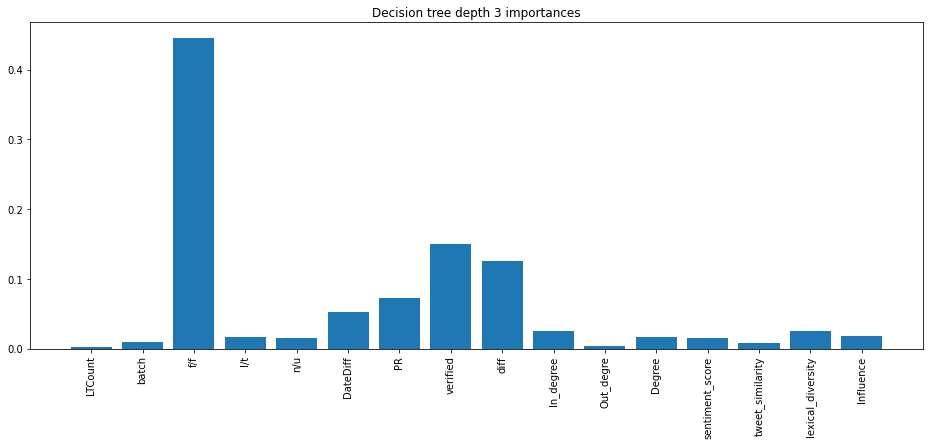

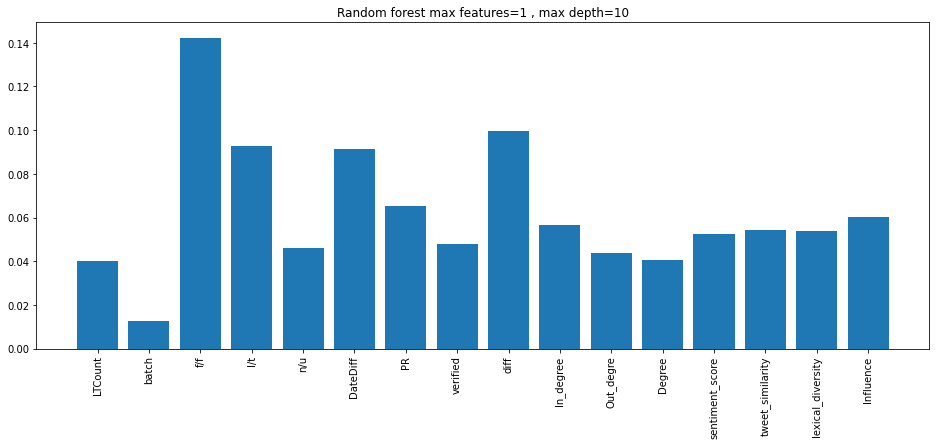

Importance of feature LTCount, DT: 0.002, RF: 0.040
Importance of feature batch, DT: 0.009, RF: 0.013
Importance of feature f/f, DT: 0.445, RF: 0.142
Importance of feature l/t, DT: 0.017, RF: 0.093
Importance of feature n/u, DT: 0.015, RF: 0.046
Importance of feature DateDiff, DT: 0.053, RF: 0.091
Importance of feature PR, DT: 0.072, RF: 0.065
Importance of feature verified, DT: 0.150, RF: 0.048
Importance of feature diff, DT: 0.125, RF: 0.100
Importance of feature In_degree, DT: 0.025, RF: 0.057
Importance of feature Out_degre, DT: 0.003, RF: 0.044
Importance of feature Degree, DT: 0.017, RF: 0.041
Importance of feature sentiment_score, DT: 0.015, RF: 0.053
Importance of feature tweet_similarity, DT: 0.008, RF: 0.054
Importance of feature lexical_diversity, DT: 0.025, RF: 0.054
Importance of feature Influence, DT: 0.018, RF: 0.060


In [87]:
rf = RandomForestClassifier(n_estimators=500, 
                            criterion='entropy', 
                            max_features=1, 
                            max_depth=10, 
                            n_jobs=2)



rf.fit(X_train, y_train)
_, ax1 = plt.subplots(1, 1, figsize=(16,6))
xx = np.arange(len(dt.feature_importances_))
ax1.bar(xx, dt.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(column_names, rotation='vertical')
ax1.set_title('Decision tree depth 3 importances')
plt.show()

_, ax2 = plt.subplots(1, 1, figsize=(16,6))
ax2.bar(xx, rf.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(column_names, rotation='vertical')
ax2.set_title('Random forest max features=1 , max depth=10')
plt.show()

for i, column in enumerate(column_names):
    if dt.feature_importances_[i] > 0 or rf.feature_importances_[i]:
        print('Importance of feature {}, DT: {:.3f}, RF: {:.3f}'.format(column, dt.feature_importances_[i], rf.feature_importances_[i]))


In [88]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file

with open("treeF.dot", 'w') as f:
    f = export_graphviz(tree, out_file=f,
                        feature_names=column_names,  
                        class_names=testML_clean['Label_Source'].unique(),  
                        filled=True, rounded=True,  
                        special_characters=False)




In [89]:
pt = pd.DataFrame(prediction_test)
pt

,0
0,bot
1,human
2,human
3,human
4,human
...,...
1077,human
1078,bot
1079,human
1080,human


In [90]:
yt= pd.DataFrame(y_test, )
yt

,0
0,bot
1,human
2,human
3,human
4,human
...,...
1077,human
1078,human
1079,human
1080,human


In [91]:
df=pd.DataFrame(X_test)


In [92]:
df= pd.concat([df,yt],axis=1)
df= pd.concat([df,pt],axis=1)

In [103]:
df.columns = ['LTCount','batch','f/f','l/t','n/u','DateDiff','PR','verified','diff','In_degree','Out_degre','Degree','sentiment_score','tweet_similarity','lexical_diversity','Influence','True_Label','Predicted_Label']





In [104]:
df 

,LTCount,batch,f/f,l/t,n/u,DateDiff,PR,verified,diff,In_degree,Out_degre,Degree,sentiment_score,tweet_similarity,lexical_diversity,Influence,True_Label,Predicted_Label
0,0,12,2.823383,0.012103,0.923077,7133321.0,0.15,False,339584.533333,0,2,2,0.788281,15.0,94.233328,-0.490759,bot,bot
1,20,12,0.002941,0.012195,0.470588,25306810.428571,0.291254,True,89927.785714,2,18,19,0.938844,25.5,97.508676,-0.575383,human,human
2,18,12,0.846909,0.003223,0.105263,63661836.833333,0.157434,False,13836.333333,1,18,18,0.364527,16.0,96.283551,-0.598156,human,human
3,8,12,0.898834,0.012185,1.0,13449662.677419,0.231969,True,2975.0,4,5,8,0.866538,18.0,97.406688,-0.484591,human,human
4,3,12,0.097278,0.014371,0.736842,112991467.0,0.596957,True,75229.0,5,2,5,0.708039,3.5,96.197552,0.053681,human,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0,16097552,0.019131,0.466884,1.0,11971149.565217,0.15,False,346553.782609,0,7,7,0.448114,18.0,97.81399,-0.587243,human,human
1078,0,12,26.342857,0.0,0.96,1645077.966667,0.15,False,729629.766667,0,20,20,0.740749,16.0,96.452991,-0.718044,human,bot
1079,0,12,2.292438,0.009696,1.0,70792328.333333,0.15,False,198216.333333,0,3,3,0.777395,21.0,96.236012,-0.990778,human,human
1080,0,12,1.083653,0.029851,0.869565,31520518.416667,0.15,False,496376.0,0,5,5,0.608928,19.5,97.846039,-0.654479,human,human


In [105]:
# dftemp=df.replace(to_replace="bot",value="red")
# dftemp=df.replace(to_replace="human",value="blue")

# sns.set(rc = {'figure.figsize':(20,20)})
# fig, ax =plt.subplots(1,2)
# sns.scatterplot(data=dftemp,x='f/f',y='DateDiff', c=dftemp.Predicted_Label, ax=ax[0],alpha=0.4).set_title('Predicted')
# sns.scatterplot(data=dftemp,x='f/f',y='DateDiff', c=dftemp.True_Label, ax=ax[1],alpha=0.4).set_title('Actual')
# fig.show()


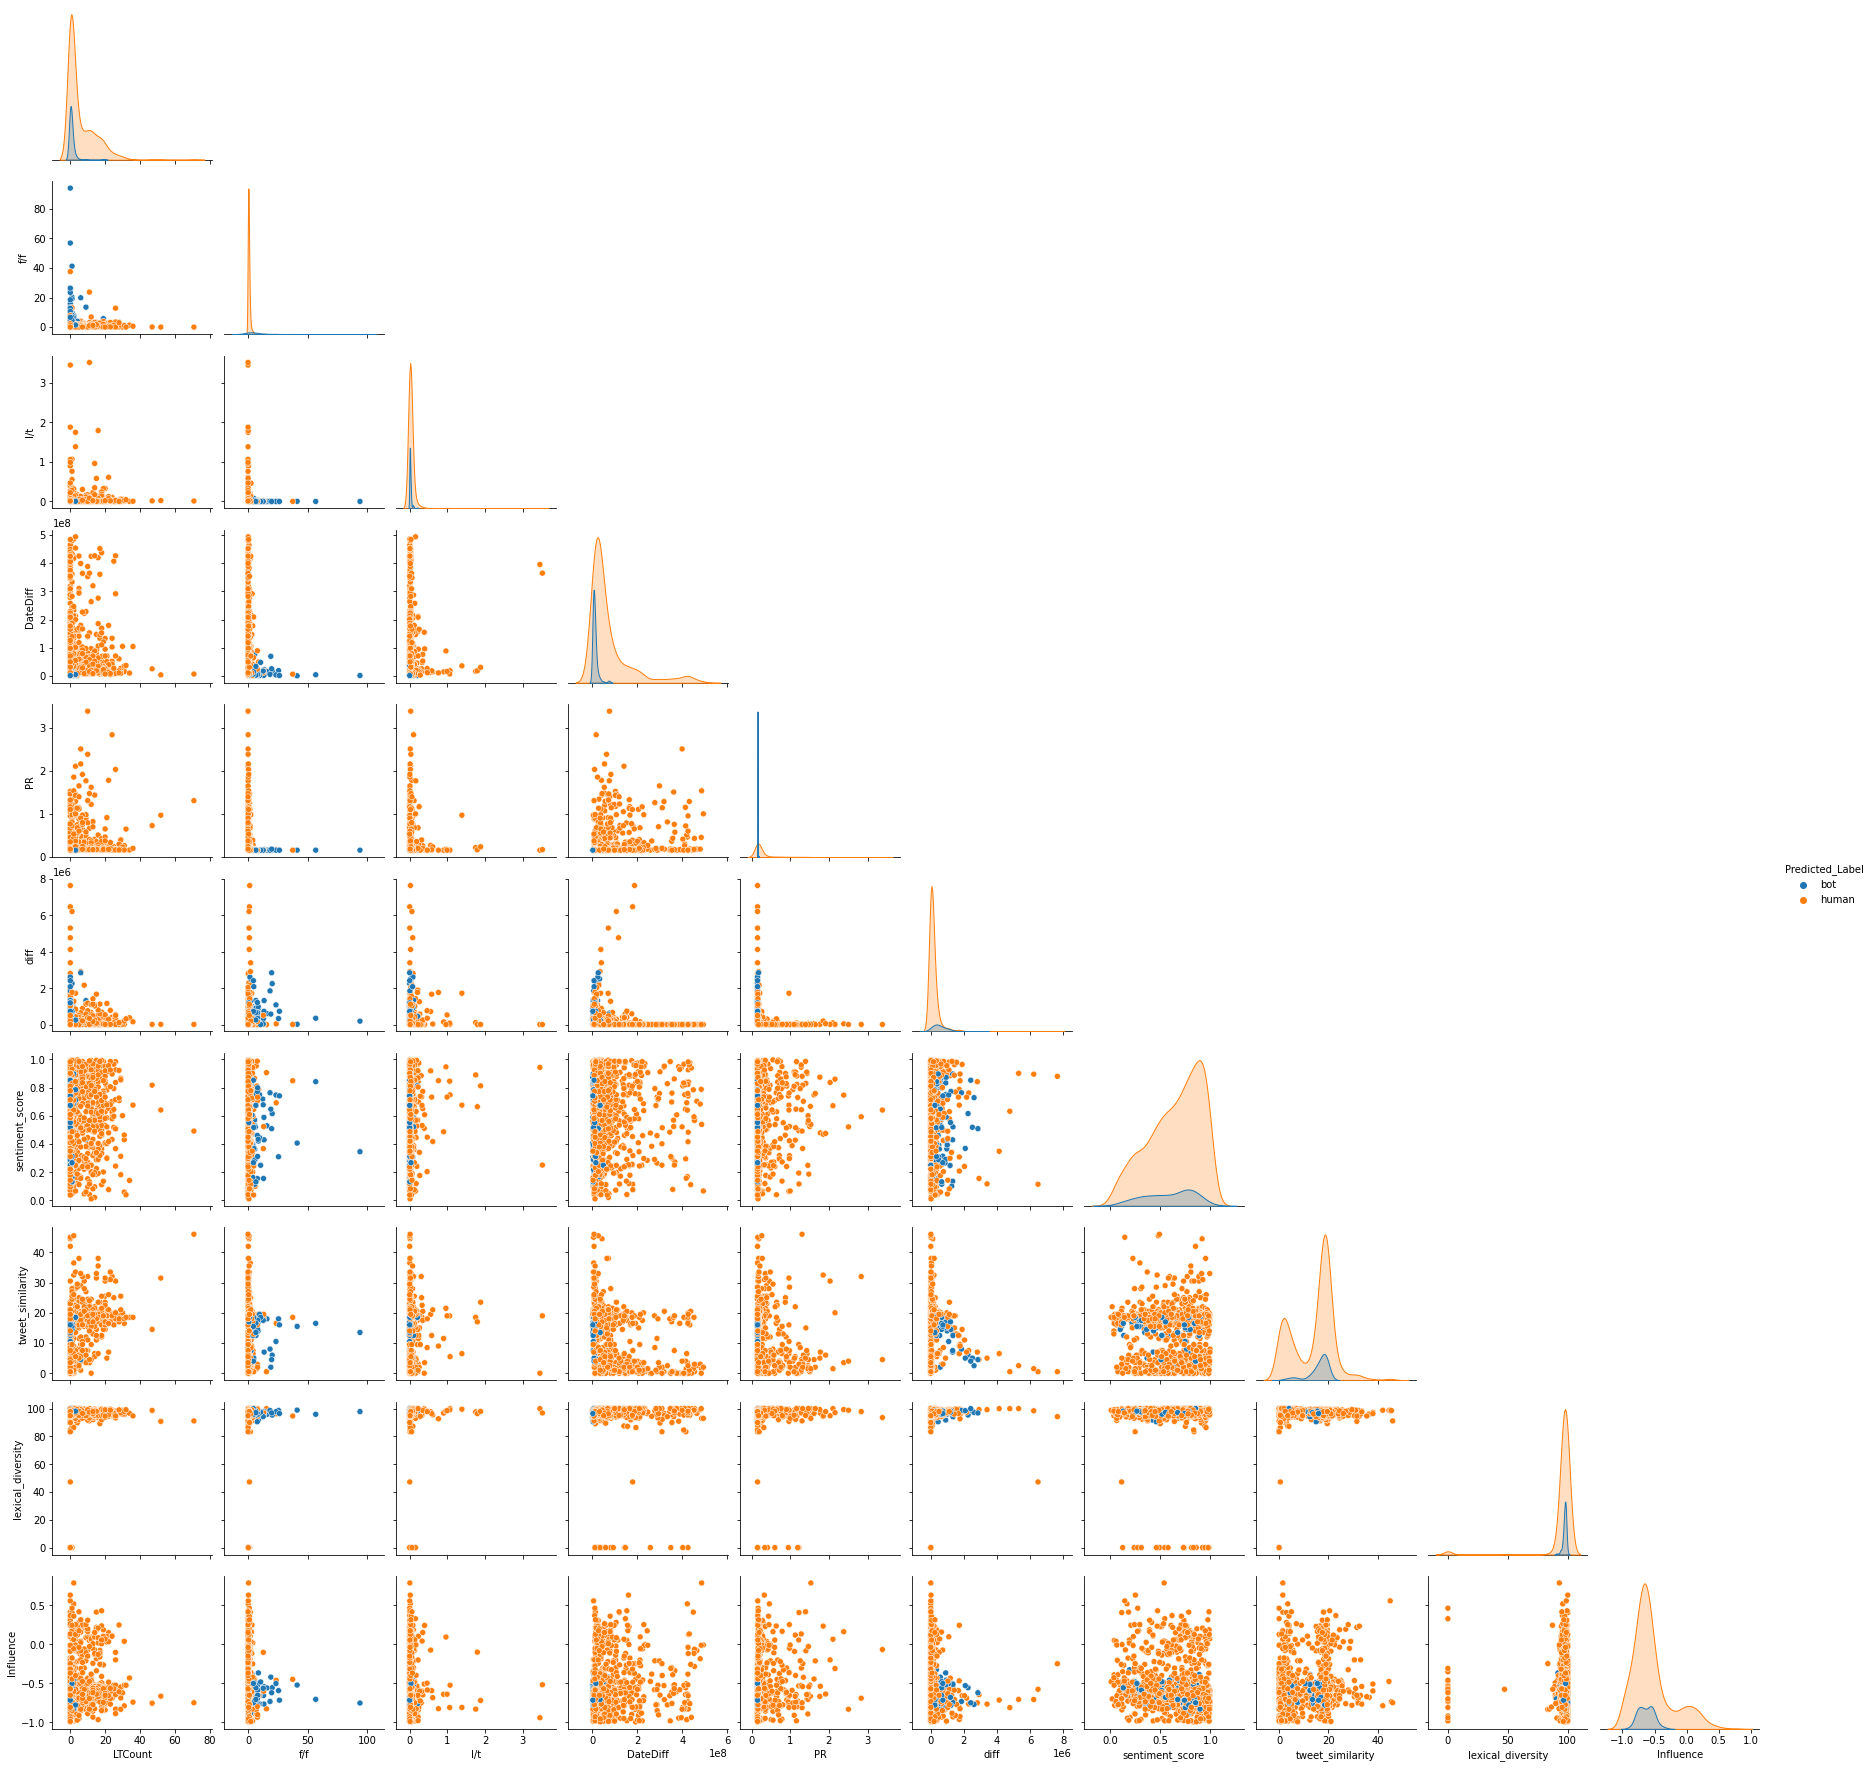

In [106]:

dfP= df.drop(columns=['True_Label', 'verified','In_degree','Out_degre','Degree','batch','n/u'])
g = sns.pairplot(dfP, hue='Predicted_Label',corner='True')


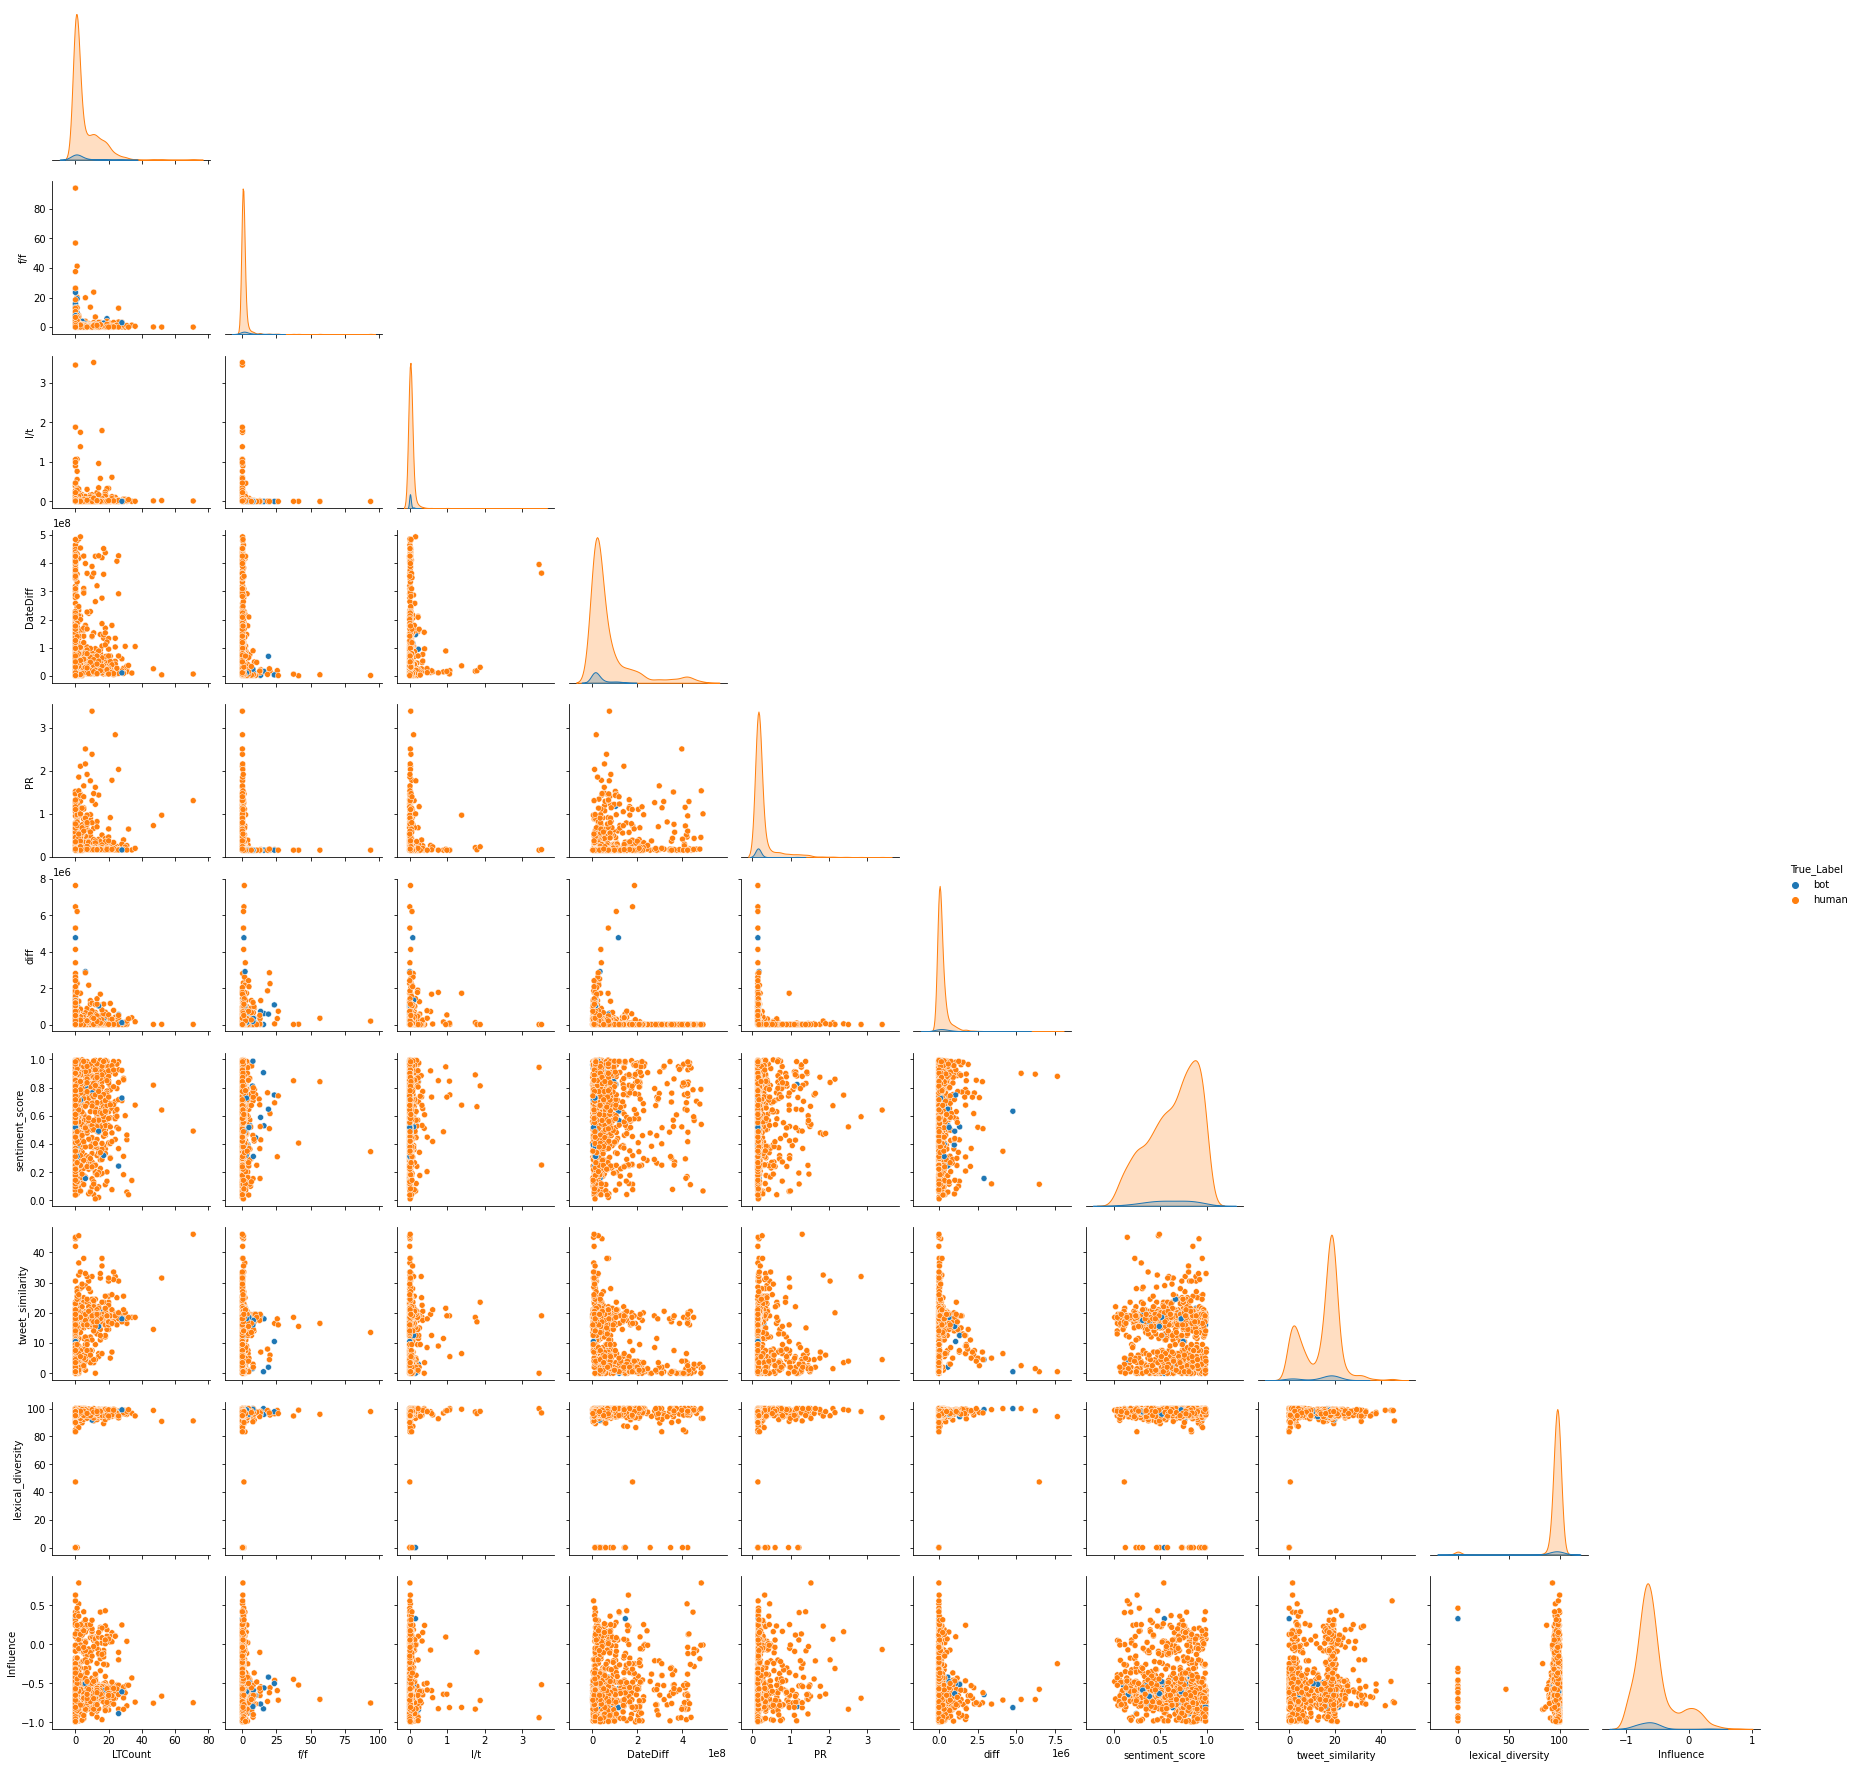

In [107]:
dfT= df.drop(columns=['Predicted_Label', 'verified','In_degree','Out_degre','Degree','batch','n/u'])
g = sns.pairplot(dfT, hue='True_Label',corner='True')

# Graph Production--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [108]:
def decode_sentiment(score):
  if score>0.6:
    return "Positive"
  elif score<0.4:
    return "Negative"
  else:
    return "Neutral"

In [109]:

test
test['sentiment'] = test['sentiment_score'].apply(lambda x: decode_sentiment(x))

In [100]:
# hh = test.index[test.Label == 'humanhuman']

# nx_graph = nx.DiGraph()
# for index, row in test.iterrows():
#     nx_graph.add_node(row["SourceID"], label=row["Label_Source"])
#     nx_graph.add_node(row["TargetID"], label=row["Label_Target"])
#     nx_graph.add_edge(row["SourceID"], row["TargetID"])
# nt = Network('700px', '700px')
# nt.from_nx(nx_graph)
# nt.toggle_physics(True)
# # nt.show('nx.html')

In [110]:
test

,Ignore_x,Ignore_x.1,SourceID,TargetID_x,Label_Source,Label_Target,Label,LTCount,batch,f/f,...,referenced_tweets,source,text,label,sentiment_score,sentiment_x,tweet_similarity,lexical_diversity,sentiment_y,sentiment
0,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @Drhaclarke: @BethDarnall @IASPpain @speaki...,human,0.888911,Positive,19.0,99.025365,0.615870,Positive
1,1647273198,1647273198,916075086687408128,36262246,human,human,humanhuman,2,12,1.738832,...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Usually, costs go up when scaling. # of active...",human,0.523836,Neutral,18.5,99.455440,0.608544,Neutral
2,1647273198,1647273198,45604122,36262246,human,human,humanhuman,19,12,0.037924,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@diogomartf Thanks Diogo 🙌 I will be in touch,human,0.979988,Positive,19.5,94.720322,0.678240,Positive
3,1647273198,1647273198,307240276,38229171,human,human,humanhuman,5,12,1.796564,...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@ThisIsJoshTseng Wouldn't be a radical change....,human,0.681449,Positive,18.0,97.875685,0.465690,Positive
4,1647273198,1647273198,79276505,38229171,human,human,humanhuman,30,12,0.132227,...,NaN,"<a href=""http://twitter.com/download/android"" ...",@Shpigford @LaserTweets Sorry that turned into...,human,0.488007,Neutral,21.0,98.489936,0.559709,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10814,1647273198,1647273198,53097744,115378178,human,human,humanhuman,5,12,0.037836,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@SayedHa39253634 I asked a Taliban spokesman j...,human,0.155733,Negative,17.5,98.479566,0.494300,Negative
10815,1647273198,1647273198,1072730425,928196912,human,human,humanhuman,0,12,0.257670,...,NaN,Twitter for iPhone,The greatest joke ever told was when Harris Wi...,human,0.918107,Positive,2.0,98.000000,0.530721,Positive
10816,1647273198,1647273198,245821992,2402374440,human,human,humanhuman,0,14151945,0.149264,...,"[{'type': 'retweeted', 'id': '1501989444517310...",Twitter Web App,RT @kuldeep_saxena: Finally placed the order.....,human,0.959641,Positive,1.5,100.000000,0.953533,Positive
10817,1647273198,1647273198,16225240,36728196,human,human,humanhuman,2,12,0.001244,...,NaN,Twitter for iPhone,Just landed! It’s almost spring. Why is it so ...,human,0.051723,Negative,17.0,97.382455,0.648692,Negative


In [111]:
# pyvis_nt.inherit_edge_colors(True)
# test = pd.read_csv('/Users/pometry/Desktop/sentiments1.csv')
pyvis_nt = Network('900px', '1400px', directed = True)
for index, row in test.iterrows():
    if row["Label_Source"] == "bot":
        pyvis_nt.add_node(row["SourceID"],  shape='image', image ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGZM6dmn0zwPv0E6CYfGve08tCFQvRHt9j9g&usqp=CAU")
    if row["Label_Source"] == "human":
        pyvis_nt.add_node(row["SourceID"], shape='image', image ="https://i0.wp.com/caravetclinic.com/wp-content/uploads/2016/07/person-icon-blue.png?ssl=1")

    if row["Label_Target"] == "bot":
        pyvis_nt.add_node(row["TargetID_x"],  shape='image', image ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGZM6dmn0zwPv0E6CYfGve08tCFQvRHt9j9g&usqp=CAU")
    if row["Label_Target"] == "human":
        pyvis_nt.add_node(row["TargetID_x"], shape='image', image ="https://i0.wp.com/caravetclinic.com/wp-content/uploads/2016/07/person-icon-blue.png?ssl=1")
        
        
        
    if row["sentiment"] == "Positive":
        pyvis_nt.add_edge(row["SourceID"], row["TargetID_x"], color='green', width=4)
    elif row["sentiment"] == "Neutral":
        pyvis_nt.add_edge(row["SourceID"], row["TargetID_x"], color='black', width=1)
    else: 
        pyvis_nt.add_edge(row["SourceID"], row["TargetID_x"], color='red', width=6)


        

    
    
pyvis_nt.toggle_physics(True)
pyvis_nt.set_edge_smooth('smooth')
pyvis_nt.show_buttons()
pyvis_nt.show('nx.html')

Classification accuracy on test set with max features = None and max_depth = 10: 0.712


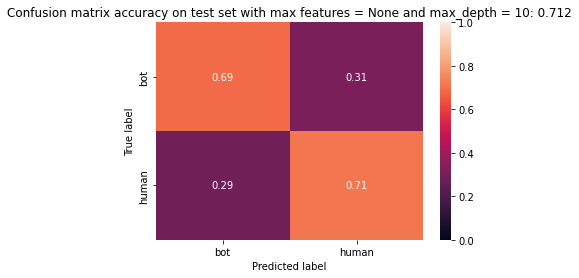

In [112]:
rf = RandomForestClassifier(n_estimators=n_estimators, 
                            criterion='entropy', 
                            max_features='sqrt', 
                            max_depth=2, 
                            n_jobs=2,
                            random_state=1337, class_weight='balanced')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_, title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))


In [114]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

In [116]:
X_train

array([[1, 12, 0.514833215046132, ..., 18.5, 97.13218389175204,
        0.038872123],
       [5, 12, 0.0060367174461134, ..., 21.0, 97.02006576398416,
        -0.577312],
       [22, 12, 1.178438661710037, ..., 19.0, 97.24071760024938,
        -0.5892642],
       ...,
       [1, 12, 6.0703745164082665e-05, ..., 2.5, 100.0, -0.43841627],
       [4, 12, 0.3322612037541029, ..., 8.5, 95.47380156075808,
        -0.48882443],
       [8, 12, 3.5508982035928143, ..., 16.0, 97.28508864872504,
        -0.6136552]], dtype=object)